<a href="https://colab.research.google.com/github/anshupandey/Computer-Vision/blob/master/GAN_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.datasets import mnist

In [ ]:
#load data
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


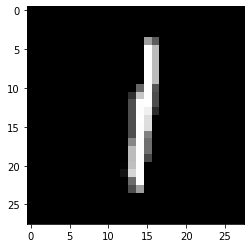

Label is:  1


In [ ]:
index = 50150
plt.imshow(xtrain[index],cmap='gray')
plt.show()
print("Label is: ",ytrain[index])

In [ ]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
gen_input = layers.Input(shape=(100,))
x = layers.Dense(256*7*7,input_shape=(100,),activation='relu')(gen_input)
x = layers.BatchNormalization()(x)
x = layers.Reshape((7,7,256))(x)
x = layers.UpSampling2D(size=(2,2))(x)
x = layers.Conv2D(128,kernel_size=(5,5),activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D(size=(2,2))(x)
gen_output = layers.Conv2D(1,kernel_size=(5,5),activation='relu',padding='same')(x)
generator = models.Model(inputs=gen_input,outputs=gen_output)
generator.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 12544)             1266944   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 128)       819328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)      

In [ ]:
dis_input = layers.Input(shape=(28,28,1))
x = layers.Conv2D(128,kernel_size=(5,5),activation='relu',padding='same')(dis_input)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Conv2D(128,kernel_size=(5,5),activation='relu',padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Flatten()(x)
dis_output = layers.Dense(1,activation='sigmoid')(x)

discriminator = models.Model(inputs=dis_input,outputs=dis_output)

discriminator.summary()
                  

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [ ]:
generator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
discriminator.trainable = False
x = generator(gen_input)
gan_output = discriminator(x)
gan = models.Model(inputs = gen_input,outputs= gan_output)
gan.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
functional_1 (Functional)    (None, 28, 28, 1)         2140161   
_________________________________________________________________
functional_3 (Functional)    (None, 1)                 419329    
Total params: 2,559,490
Trainable params: 2,114,817
Non-trainable params: 444,673
_________________________________________________________________


In [ ]:
gan.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
epochs = 30
batch_size=128
batch_count = xtrain.shape[0]//batch_size

for i in range(epochs):
  for j in range(batch_count):
    # input for generator
    noise_input = np.random.rand(batch_size,100)
    #predictions from generator
    predictions = generator.predict(noise_input,batch_size=batch_size)

    #creating input for discriminator
    image_batch = xtrain[np.random.randint(0,xtrain.shape[0],size=batch_size)]
    x_dis = np.concatenate([predictions,image_batch])
    # labels for discriminators
    y_dis = np.array([0]*batch_size + [1]*batch_size).reshape(-1,1)
    #train the discriminator
    discriminator.trainable = True
    discriminator.train_on_batch(x_dis,y_dis)

    #traint the generator
    discriminator.trainable = False
    y_gen = np.array([1]*batch_size)
    gan.train_on_batch(noise_input,y_gen)
  print("Epoch ",i," completed")


Epoch  0  completed
Epoch  1  completed
Epoch  2  completed
Epoch  3  completed
Epoch  4  completed
Epoch  5  completed
Epoch  6  completed
Epoch  7  completed
Epoch  8  completed
Epoch  9  completed
Epoch  10  completed
Epoch  11  completed
Epoch  12  completed
Epoch  13  completed
Epoch  14  completed
Epoch  15  completed
Epoch  16  completed
Epoch  17  completed
Epoch  18  completed
Epoch  19  completed
Epoch  20  completed
Epoch  21  completed
Epoch  22  completed
Epoch  23  completed
Epoch  24  completed
Epoch  25  completed
Epoch  26  completed
Epoch  27  completed
Epoch  28  completed
Epoch  29  completed


In [ ]:
def plot_output():
  noise_input = np.random.rand(100,100)
  prediction = generator.predict(noise_input)
  print(prediction.shape)

  plt.figure(figsize=(20,10))
  for i in range(prediction.shape[0]):
    plt.subplot(10,10,i+1)
    plt.imshow(prediction[i,:,:,:].reshape(28,28),cmap='gray')
    plt.axis('off')
  plt.show()


(100, 28, 28, 1)


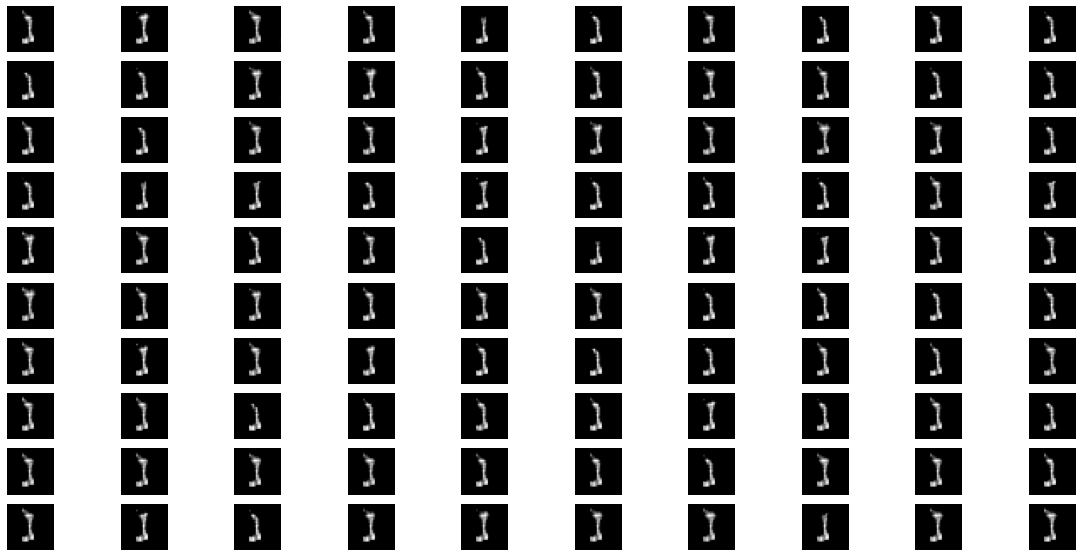

In [ ]:
plot_output()